In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, LeakyReLU
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, cohen_kappa_score, matthews_corrcoef

In [2]:
df = pd.read_csv("oversample_smote.csv")

In [3]:
selected_columns = ['hv005', 'hv021', 'hv023', 'hv105', 'hv115', 'hv104', 'hv106', 'hml18',
                    'shb70', 'ha53', 'shb13', 'hv206', 'hv116', 'avg_sys', 'avg_dia', 'bmi']

In [4]:
#split the data into training data testing sets
X = df[selected_columns]
y = df['final_diabetes']

In [5]:
print("Input Shape: ", X.shape)
print("y Shape: ", y.shape)

Input Shape:  (1424964, 16)
y Shape:  (1424964,)


In [6]:
# Convert X and y to numpy arrays if they are not already
X = np.array(X)
y = np.array(y)

In [7]:
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [8]:
# Reshape data for the CNN-LSTM hybrid model
X = X.reshape((X.shape[0], X.shape[1], 1))
X.shape

(1424964, 16, 1)

In [9]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dropout, LSTM, Dense, LeakyReLU, BatchNormalization

def cnn_lstm(Learning_rate=0):
    # Define the robust CNN-LSTM hybrid model
    model = Sequential()
    model.add(Conv1D(filters=256, kernel_size=3, padding="same", input_shape=(16, 1)))
    model.add(LeakyReLU())
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))
    
    model.add(Conv1D(filters=128, kernel_size=3, padding="same"))
    model.add(LeakyReLU())
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))
    
    model.add(Conv1D(filters=64, kernel_size=3, padding="same"))
    model.add(LeakyReLU())
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))
    
    model.add(LSTM(128, return_sequences=True))
    model.add(LeakyReLU())
    model.add(Dropout(0.5))
    
    model.add(LSTM(64))
    model.add(LeakyReLU())
    model.add(Dropout(0.5))
    
    model.add(Dense(64))
    model.add(LeakyReLU())
    model.add(Dropout(0.5))
    
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

model = cnn_lstm()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 16, 256)           1024      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 16, 256)           0         
                                                                 
 batch_normalization (BatchN  (None, 16, 256)          1024      
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 8, 256)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 8, 256)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 8, 128)            9

In [11]:
# Train the model on the entire training data
history = model.fit(X_train, y_train, epochs=10, batch_size=1024, validation_data=(X_test, y_test))

# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.3).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred_binary)
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)

# Print metrics and confusion matrix
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", roc_auc)
print("Specificity:", specificity)
print("Cohen's kappa:", kappa)
print("Matthews correlation coefficient:", mcc)

Epoch 1/10
1114/1114 [==============================] - 42s 32ms/step - loss: 0.0821 - accuracy: 0.9691 - val_loss: 0.0467 - val_accuracy: 0.9797
Epoch 2/10
1114/1114 [==============================] - 40s 36ms/step - loss: 0.0569 - accuracy: 0.9775 - val_loss: 0.0436 - val_accuracy: 0.9808
Epoch 3/10
1114/1114 [==============================] - 44s 39ms/step - loss: 0.0531 - accuracy: 0.9784 - val_loss: 0.0434 - val_accuracy: 0.9811
Epoch 4/10
1114/1114 [==============================] - 47s 42ms/step - loss: 0.0510 - accuracy: 0.9791 - val_loss: 0.0413 - val_accuracy: 0.9818
Epoch 5/10
1114/1114 [==============================] - 49s 44ms/step - loss: 0.0494 - accuracy: 0.9794 - val_loss: 0.0404 - val_accuracy: 0.9826
Epoch 6/10
1114/1114 [==============================] - 51s 46ms/step - loss: 0.0480 - accuracy: 0.9801 - val_loss: 0.0402 - val_accuracy: 0.9824
Epoch 7/10
1114/1114 [==============================] - 54s 49ms/step - loss: 0.0471 - accuracy: 0.9802 - val_loss: 0.0383 -

In [12]:
import shap

C:\Users\khand\anaconda3\envs\gpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [62]:
# Function to make predictions (needed for KernelExplainer)
def predict_proba(data):
    data_reshaped = data.reshape((data.shape[0], data.shape[1], 1))
    return model.predict(data_reshaped).flatten()

# Select a subset of the training data as the background dataset for SHAP
X_train_sample = X_train[:5].reshape(5, -1)  # Adjust the sample size if needed

# Select a subset of the test data for SHAP explanations
X_test_sample = X_test[:50].reshape(50, -1)  # Adjust the sample size if needed

print(X_train_sample.shape)
print(X_test_sample.shape)

(5, 16)
(50, 16)


In [25]:
# Create a SHAP KernelExplainer
explainer = shap.KernelExplainer(predict_proba, X_train_sample)

In [26]:
# Compute SHAP values for the test sample
shap_values = explainer.shap_values(X_test_sample)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [04:30<00:00,  5.41s/it]


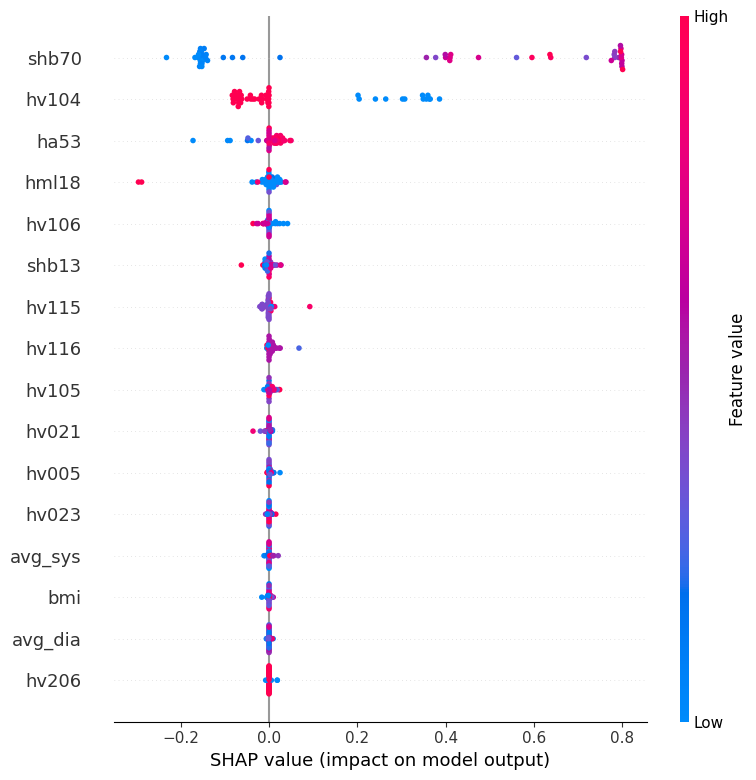

In [63]:
# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test_sample, feature_names=selected_columns)

SHAP Summary Bar plot


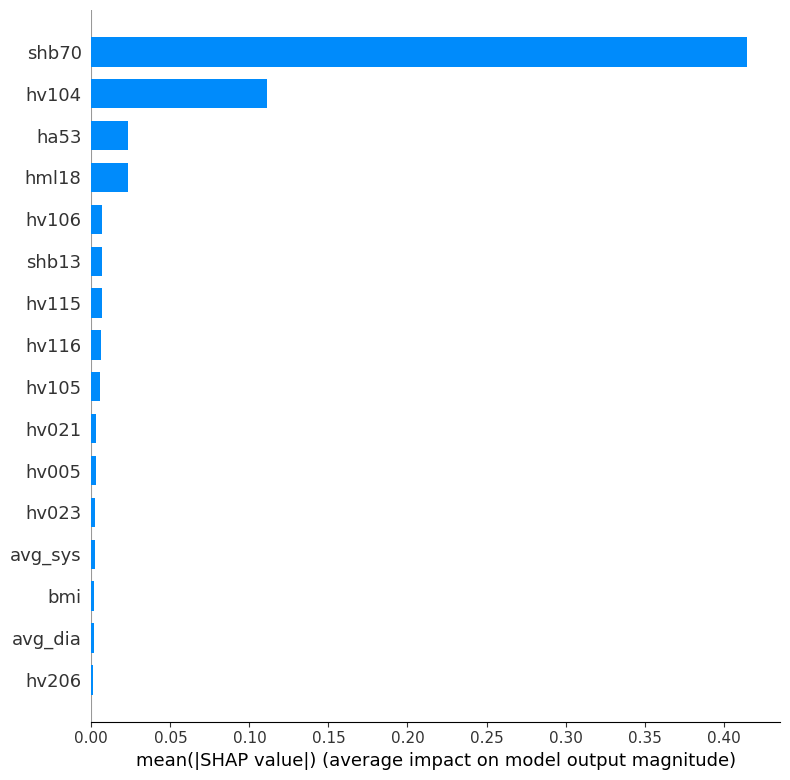

In [64]:
# Bar Plot
print("SHAP Summary Bar plot")
shap.summary_plot(shap_values, X_test_sample, feature_names=selected_columns, plot_type="bar")